True
Test Image: 10.pgm, Predicted Label: 3, Confidence: 2379.25953436


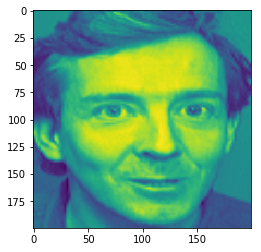

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

train_path = "./train/"
test_path = "./test/"
face_cascade_path = "./haarcascade_frontalface_default.xml"
print(os.path.exists(face_cascade_path))
face_cascade = cv2.CascadeClassifier(face_cascade_path)
recog = cv2.createEigenFaceRecognizer()


def get_images_and_labels(path):
    # 画像を格納する配列
    images = []
    # ラベルを格納する配列
    labels = []
    # ファイル名を格納する配列
    files = []
    for f in os.listdir(path):
        # 画像のパス
        image_path = os.path.join(path, f)
        # グレースケールで画像を読み込む
        image_pil = Image.open(image_path)#.convert('L')
        # NumPyの配列に格納
        image = np.array(image_pil, 'uint8')
        # Haar-like特徴分類器で顔を検知
        faces = face_cascade.detectMultiScale(image)
        # 検出した顔画像の処理
        #for (x, y, w, h) in faces:
            # 顔を 200x200 サイズにリサイズ
            #roi = cv2.resize(image[y: y + h, x: x + w], (200, 200), interpolation=cv2.INTER_LINEAR)
        roi = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
            # 画像を配列に格納
        images.append(roi)
            # ファイル名からラベルを取得
        labels.append(3)
            # ファイル名を配列に格納
        files.append(f)

    return images, labels, files


# トレーニング画像を取得
image1 = "./att_faces/orl_faces/s3"
images, labels, files = get_images_and_labels(image1)

# トレーニング実施
recog.train(images, np.array(labels))

# テスト画像を取得
image2 = "./att_faces/orl_faces/test3"
test_images, test_labels, test_files = get_images_and_labels(image2)

i = 0
while i < len(test_labels):
    # テスト画像に対して予測実施
    label, confidence = recog.predict(test_images[i])
    # 予測結果をコンソール出力
    print("Test Image: {}, Predicted Label: {}, Confidence: {}".format(test_files[i], label, confidence))
    plt.imshow(test_images[i])
    plt.show()

    i += 1

# 終了処理
#cv2.destroyAllWindows()